In [4]:
from os import path
from PIL import Image
import os
import numpy as np

all_images = []

dogs_path = path.join('.', 'database', 'train', 'dogs')
cats_path = path.join('.', 'database', 'train', 'cats')

for dog_image in os.listdir(dogs_path):
    try:
        
        img = Image.open(path.join(dogs_path, dog_image))
        img = img.resize((128, 128))
        all_images.append([np.array(img), 0])
        
    except Exception as e:
        print(f'error:{e}')
        continue
    
for cat_image in os.listdir(cats_path):
    try:
        
        img = Image.open(path.join(cats_path, cat_image))
        img = img.resize((128, 128))
        all_images.append([np.array(img), 1])
        
    except Exception as e:
        print(f'error:{e}')
        continue

np.random.shuffle(all_images)
np.random.shuffle(all_images)
np.random.shuffle(all_images)


KeyboardInterrupt: 

In [2]:
import random

x, y = [], []
x_val, y_val = [], []

for i in range(1000):
    temp = all_images.pop(random.randint(0, len(all_images)-1))
    x_val.append(temp[0])
    y_val.append(temp[1])
    
for temp in all_images:
    x.append(temp[0])
    y.append(temp[1])
    
del all_images, temp

In [3]:
import numpy as np

x = np.array(x)
x_val = np.array(x_val)
y = np.array(y)
y_val = np.array(y_val)

In [4]:
x.shape

(24005, 128, 128, 3)

In [5]:
import keras, tensorflow
from keras import Sequential

optimizer = keras.optimizers.Adam(learning_rate=0.001) 

model = Sequential([
    keras.Input(shape=(128, 128, 3)),
    
    tensorflow.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPooling2D(2, 2),
    tensorflow.keras.layers.Dropout(0.2),
    
    tensorflow.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPooling2D(2, 2),  
    tensorflow.keras.layers.Dropout(0.2), 
    
    tensorflow.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPooling2D(2, 2), 
    tensorflow.keras.layers.Dropout(0.2),  
    
    tensorflow.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPooling2D(2, 2), 
    tensorflow.keras.layers.Dropout(0.2),
      
    tensorflow.keras.layers.Flatten(),
    
    tensorflow.keras.layers.Dense(512, activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Dropout(0.2),
       
    tensorflow.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [6]:
from keras.callbacks import Callback

class CustomEarlyStopping(Callback):
    def __init__(self, accuracy_threshold=0.9, loss_threshold=0.2):
        super(CustomEarlyStopping, self).__init__()
        self.accuracy_threshold = accuracy_threshold
        self.loss_threshold = loss_threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get('val_accuracy')  # Training accuracy
        loss = logs.get('val_loss')          # Training loss
        
        # Check if both conditions are met
        if accuracy >= self.accuracy_threshold and loss <= self.loss_threshold:
            self.model.save('./cat_dog_classification.keras', overwrite=True)
            print(f"\nStopping training as accuracy reached {accuracy:.2f} and loss fell below {loss:.2f}.")
            self.model.stop_training = True  
    
custom_early_stop = CustomEarlyStopping(accuracy_threshold=0.9, loss_threshold=0.1)

save_model_callback = keras.callbacks.ModelCheckpoint(
    
    filepath='./cat_dog_classification.keras',
    monitor='val_accuracy',
    mode="max",
    save_best_only=True,
    verbose=1
    
)

In [ ]:
history = model.fit(
    x, y,
    validation_data=(x_val, y_val), 
    epochs=100, 
    batch_size=32, 
    callbacks=[custom_early_stop, save_model_callback], 
    shuffle=True,
    use_multiprocessing=True,
)

In [9]:
from os import path
from PIL import Image
import os
import numpy as np

from tensorflow.keras.models import load_model
model = load_model("./cat_dog_classification.keras") 

# 0 -> dog
# 1 -> cat

y_true = []
y_pred = []

dog_test_path = path.join('.', 'database', 'test', 'dogs')
cat_test_path = path.join('.', 'database', 'test', 'cats')

for image in os.listdir(dog_test_path):
    try:
        img = Image.open(path.join(dog_test_path, image))
        img = img.resize((128, 128))
        img = np.array(img)
        img = np.expand_dims(img, axis=0)
        y_true.append(0)
        
        result = np.argmax(model.predict(img), axis=1)[0]
        y_pred.append(result)
        
    except Exception as e:
        print(f'error:{e}')
        continue

for image in os.listdir(cat_test_path):
    try:
        img = Image.open(path.join(cat_test_path, image))
        img = img.resize((128, 128))
        img = np.array(img)
        img = np.expand_dims(img, axis=0)
        y_true.append(1)
        
        result = np.argmax(model.predict(img), axis=1)[0]
        y_pred.append(result)
        
    except Exception as e:
        print(f'error:{e}')
        continue

1/1 [==============================] - 0s 27ms/step


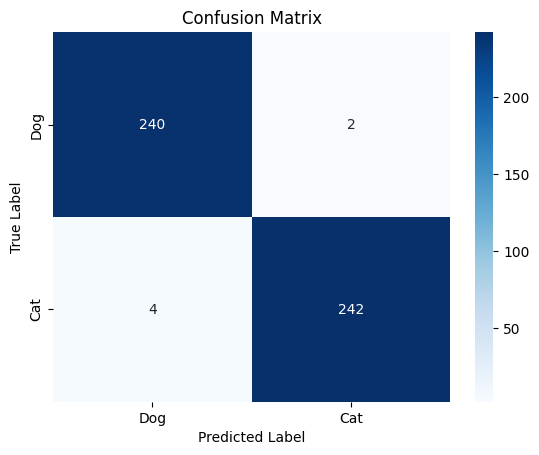

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       242
           1       0.99      0.98      0.99       246

    accuracy                           0.99       488
   macro avg       0.99      0.99      0.99       488
weighted avg       0.99      0.99      0.99       488



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom labels
labels = ["Dog", "Cat"]

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred))


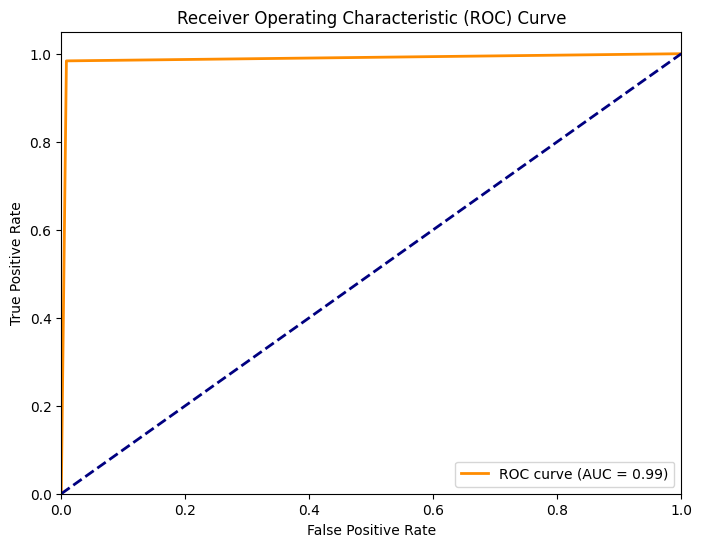

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


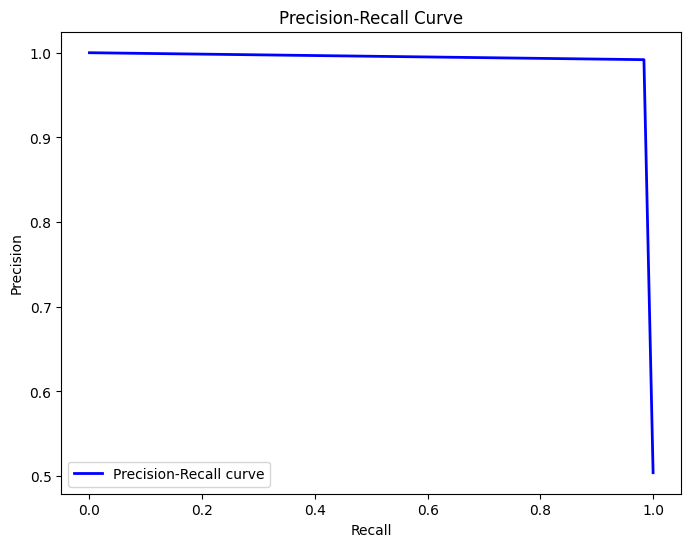

Average Precision (AP): 0.98


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Calculate Average Precision (AP)
average_precision = average_precision_score(y_true, y_pred)
print(f'Average Precision (AP): {average_precision:.2f}')
